# Clustering-based Pairs Trading
<h4> For this section, we will try to explore the clustering pairs trading. <br>


*   K-means clustering
*   Hierarchical Clustering
*   Affinity Propagation Clustering



In [ ]:
# pip install missingno
# pip install pandas
# pip install yahoo-finance
# pip install numpy
# pip install scikit-learn
# pip install kneed
# pip install dataframe_image
#pip install scipy
# pip install statsmodels
!pip install yahoo_fin
!pip install kneed
!pip install dataframe_image

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import yahoo_fin.stock_info as si
import yfinance as yf
import pandas as pd
import missingno
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.metrics import silhouette_score
from statsmodels.tsa.stattools import coint
import dataframe_image as dfi
import seaborn as sns
from sklearn.decomposition import PCA
from statsmodels.tsa.stattools import adfuller
from scipy.stats.stats import pearsonr
import random
from itertools import cycle

<ipython-input-5-6d0700753b72>:17: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


In [ ]:
# Extract the S&P 500 data from the past 5 years
# Sometimes the code is not correctly working, I guess it's because of the API error or because the stock you want in the S&P500 is not avaliable at that time period. 
#Try to either re-run or using different time-period it again.
nasdaq_list = si.tickers_sp500()
nasdaq_historical = {}
for ticker in nasdaq_list:
    nasdaq_historical[ticker] = si.get_data(ticker, start_date="01/01/2021",end_date="04/01/2023", index_as_date = False, interval="1d")
    print(ticker)
nasdaq_historical

A
AAL
AAP
AAPL
ABBV
ABC
ABT
ACGL
ACN
ADBE
ADI
ADM
ADP
ADSK
AEE
AEP
AES
AFL
AIG
AIZ
AJG
AKAM
ALB
ALGN
ALK
ALL
ALLE
AMAT
AMCR
AMD
AME
AMGN
AMP
AMT
AMZN
ANET
ANSS
AON
AOS
APA
APD
APH
APTV
ARE
ATO
ATVI
AVB
AVGO
AVY
AWK
AXP
AZO
BA
BAC
BALL
BAX
BBWI
BBY
BDX
BEN
BF-B
BG
BIIB
BIO
BK
BKNG
BKR
BLK
BMY
BR
BRK-B
BRO
BSX
BWA
BXP
C
CAG
CAH
CARR
CAT
CB
CBOE
CBRE
CCI


/usr/local/lib/python3.9/dist-packages/yahoo_fin/stock_info.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame['ticker'] = ticker.upper()


CCL
CDAY
CDNS
CDW
CE
CEG
CF
CFG
CHD
CHRW
CHTR
CI
CINF
CL
CLX
CMA
CMCSA
CME
CMG
CMI
CMS
CNC
CNP
COF
COO
COP
COST
CPB
CPRT
CPT
CRL
CRM
CSCO
CSGP
CSX
CTAS
CTLT
CTRA
CTSH
CTVA
CVS
CVX
CZR
D
DAL
DD
DE
DFS
DG
DGX
DHI
DHR
DIS
DISH
DLR
DLTR
DOV
DOW
DPZ
DRI
DTE
DUK
DVA
DVN
DXC
DXCM
EA
EBAY
ECL
ED
EFX
EIX
EL
ELV
EMN
EMR
ENPH
EOG
EPAM
EQIX
EQR
EQT
ES
ESS
ETN
ETR
ETSY
EVRG
EW
EXC
EXPD
EXPE
EXR
F
FANG
FAST
FCX
FDS
FDX
FE
FFIV
FICO
FIS
FISV
FITB
FLT
FMC
FOX
FOXA
FRC
FRT
FSLR
FTNT
FTV
GD
GE
GEHC
GEN
GILD
GIS
GL
GLW
GM
GNRC
GOOG
GOOGL
GPC
GPN
GRMN
GS
GWW
HAL
HAS
HBAN
HCA
HD
HES
HIG
HII
HLT
HOLX
HON
HPE
HPQ
HRL
HSIC
HST
HSY
HUM
HWM
IBM
ICE
IDXX
IEX
IFF
ILMN
INCY
INTC
INTU
INVH
IP
IPG
IQV


/usr/local/lib/python3.9/dist-packages/yahoo_fin/stock_info.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame['ticker'] = ticker.upper()


IR
IRM
ISRG
IT
ITW
IVZ
J
JBHT
JCI
JKHY
JNJ
JNPR
JPM
K
KDP
KEY
KEYS
KHC
KIM
KLAC
KMB
KMI
KMX
KO
KR
L
LDOS
LEN
LH
LHX
LIN
LKQ
LLY
LMT
LNC
LNT
LOW
LRCX
LUV
LVS
LW
LYB
LYV
MA
MAA
MAR
MAS
MCD
MCHP
MCK
MCO
MDLZ
MDT
MET
META
MGM
MHK
MKC
MKTX
MLM
MMC
MMM
MNST
MO
MOH
MOS
MPC
MPWR
MRK
MRNA
MRO
MS
MSCI
MSFT
MSI
MTB
MTCH
MTD
MU
NCLH
NDAQ
NDSN
NEE
NEM
NFLX
NI
NKE
NOC
NOW
NRG
NSC
NTAP
NTRS
NUE
NVDA
NVR
NWL
NWS
NWSA
NXPI
O
ODFL
OGN
OKE
OMC
ON
ORCL
ORLY
OTIS
OXY
PARA
PAYC
PAYX
PCAR
PCG
PEAK
PEG
PEP
PFE
PFG
PG
PGR
PH
PHM
PKG
PKI
PLD
PM
PNC
PNR
PNW
PODD
POOL
PPG
PPL
PRU
PSA
PSX
PTC
PWR
PXD
PYPL
QCOM
QRVO
RCL
RE
REG
REGN
RF
RHI
RJF
RL
RMD
ROK
ROL
ROP
ROST
RSG
RTX
SBAC
SBUX
SCHW
SEDG
SEE
SHW
SJM
SLB
SNA
SNPS
SO
SPG
SPGI
SRE
STE
STLD
STT
STX
STZ
SWK
SWKS
SYF
SYK
SYY
T
TAP
TDG
TDY
TECH
TEL
TER
TFC
TFX
TGT
TJX
TMO
TMUS
TPR
TRGP
TRMB
TROW
TRV
TSCO
TSLA
TSN
TT
TTWO
TXN
TXT
TYL
UAL
UDR
UHS
ULTA
UNH
UNP
UPS
URI
USB
V
VFC
VICI
VLO
VMC
VRSK
VRSN
VRTX
VTR
VTRS
VZ
WAB
WAT
WBA
WBD
WDC
WEC
WELL
WFC
WHR
WM
WMB
WMT
WRB


{'A':           date        open        high         low       close    adjclose  \
 0   2021-01-04  118.940002  120.089996  117.110001  118.639999  117.039719   
 1   2021-01-05  118.480003  120.320000  118.070000  119.610001  117.996635   
 2   2021-01-06  118.690002  123.879997  118.209999  122.889999  121.232399   
 3   2021-01-07  124.330002  127.480003  124.110001  126.160004  124.458290   
 4   2021-01-08  126.489998  127.639999  125.849998  127.059998  125.346146   
 ..         ...         ...         ...         ...         ...         ...   
 560 2023-03-27  133.580002  134.619995  132.729996  133.070007  132.853577   
 561 2023-03-28  132.539993  133.309998  132.009995  132.630005  132.414291   
 562 2023-03-29  133.949997  134.240005  132.630005  133.850006  133.632309   
 563 2023-03-30  135.270004  135.539993  133.320007  134.490005  134.271271   
 564 2023-03-31  135.399994  138.729996  134.860001  138.339996  138.114990   
 
       volume ticker  
 0    2030700      A  

In [ ]:
nasdaq_historical

{'A':           date        open        high         low       close    adjclose  \
 0   2021-01-04  118.940002  120.089996  117.110001  118.639999  117.039719   
 1   2021-01-05  118.480003  120.320000  118.070000  119.610001  117.996635   
 2   2021-01-06  118.690002  123.879997  118.209999  122.889999  121.232399   
 3   2021-01-07  124.330002  127.480003  124.110001  126.160004  124.458290   
 4   2021-01-08  126.489998  127.639999  125.849998  127.059998  125.346146   
 ..         ...         ...         ...         ...         ...         ...   
 560 2023-03-27  133.580002  134.619995  132.729996  133.070007  132.853577   
 561 2023-03-28  132.539993  133.309998  132.009995  132.630005  132.414291   
 562 2023-03-29  133.949997  134.240005  132.630005  133.850006  133.632309   
 563 2023-03-30  135.270004  135.539993  133.320007  134.490005  134.271271   
 564 2023-03-31  135.399994  138.729996  134.860001  138.339996  138.114990   
 
       volume ticker  
 0    2030700      A  

In [ ]:
data = pd.concat(nasdaq_historical)
data.reset_index(drop=True, inplace=True)
data = data.pivot(index='date', columns='ticker', values = 'adjclose')

In [ ]:
# Drop  missing data
missing = data.isnull().mean().sort_values(ascending=False)
drop_list = sorted(list(missing[missing > 0.1].index))
data.drop(labels=drop_list, axis=1, inplace=True)

In [ ]:
len(data.T)

500

In [ ]:
# Delete inf and null data
column_headers = list(data.columns)
for i in range (len(data.T)):
    column=column_headers[i]
    if(data[column].isnull().values.any() or np.isinf(data[column].values.sum())):
        data.drop(labels=column,axis=1,inplace=True)
    

In [ ]:
len(data.T)

500

In [ ]:
# Check
data=data.fillna(value=0, limit=1)
data = data.fillna(method='ffill')
print("Null value is ",data.isnull().values.any())
print("Inf value is ",np.isinf(data.values.sum()))

Null value is  False
Inf value is  False


In [ ]:
data0=data.copy(deep=True)

In [ ]:
#data.to_csv('S&P500.csv', index=False)

In [ ]:
# Start the calculation 
# 252 trading days in a year

returns = data.pct_change().mean()*252
returns = pd.DataFrame(returns)
returns.columns = ['returns']

returns['volatility'] = data.pct_change().std()*np.sqrt(252)
data = returns
data.head()

returns  volatility
ticker                      
A       0.115172    0.287587
AAL     0.116657    0.507362
AAP    -0.040923    0.317828
AAPL    0.159896    0.302390
ABBV    0.249201    0.209996

In [ ]:
# Then make a copy of the dataFrame for later use
data1=data.copy(deep=True)

In [ ]:

#Fit the scaler
X = pd.DataFrame(StandardScaler().fit(data).fit_transform(data),columns = data.columns, index = data.index)


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

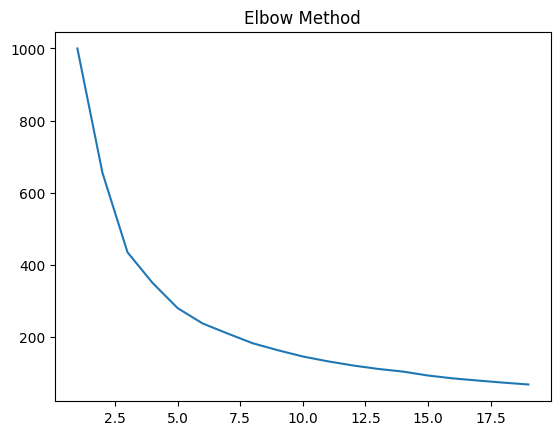

In [ ]:
# Use Elbow method to determine the K value
K = range(1,20)
distortions = []
for k in K:
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X)
    distortions.append(kmeans.inertia_)
plt.plot(K, distortions)
plt.title('Elbow Method')
plt.show()

In [ ]:
# We know the K-value we should use
kl = KneeLocator(K, distortions, curve="convex", direction="decreasing")
# Save the number of clusters using b
a=kl.elbow
a

5

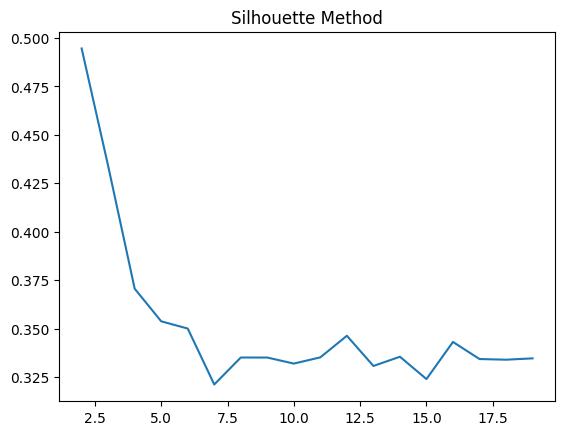

7

In [ ]:
# Use Silhouette method to determine the K value
K = range(2,20)
silhouettes = []
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10, init='random')
    kmeans.fit(X)
    silhouettes.append(silhouette_score(X, kmeans.labels_))
plt.plot(K, silhouettes)
plt.title('Silhouette Method')
plt.show()
kl = KneeLocator(K, silhouettes, curve="convex", direction="decreasing")
# Save the number of clusters using b
b=kl.elbow
b

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


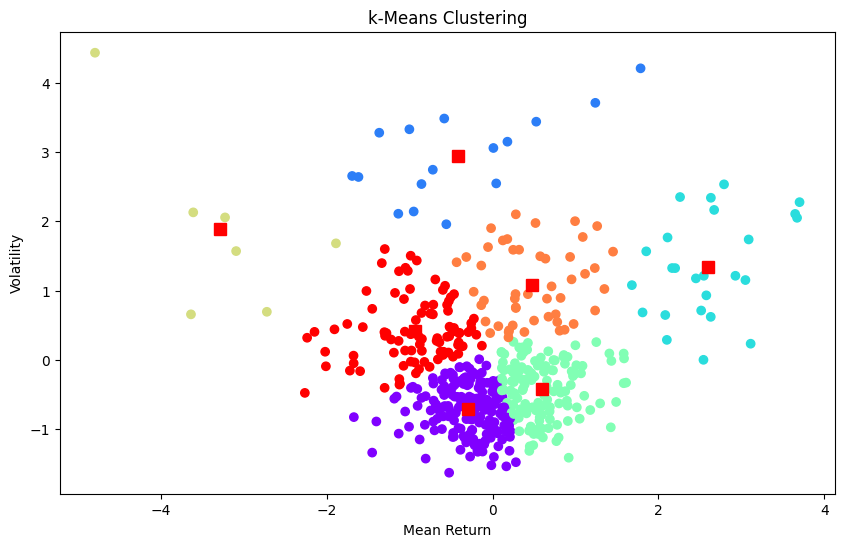

In [ ]:
# Apply the K-means model for the elbow
k_means = KMeans(n_clusters=b)
k_means.fit(X)
prediction = k_means.predict(X)

#Plot the results
centroids = k_means.cluster_centers_
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
scatter = ax.scatter(X.iloc[:,0],X.iloc[:,1], c=k_means.labels_, cmap="rainbow", label = X.index)
ax.set_title('k-Means Clustering')
ax.set_xlabel('Mean Return')
ax.set_ylabel('Volatility')
plt.plot(centroids[:,0],centroids[:,1],'rs',markersize=8)
plt.show()

In [ ]:
clustered_groups = pd.Series(index=X.index, data=k_means.labels_.flatten())
clustered_groups_all = pd.Series(index=X.index, data=k_means.labels_.flatten())
clustered_groups = clustered_groups[clustered_groups != -1]

In [ ]:
cluster_size_limit = 1000
counts = clustered_groups.value_counts()
ticker_count = counts[(counts>1) & (counts<=cluster_size_limit)]
print ("Number of clusters: %d" % len(ticker_count))
print ("Number of Pairs: %d" % (ticker_count*(ticker_count-1)).sum())

Number of clusters: 7
Number of Pairs: 60752


In [ ]:
clustered_groups

ticker
A       0
AAL     5
AAP     6
AAPL    3
ABBV    3
       ..
YUM     0
ZBH     0
ZBRA    6
ZION    6
ZTS     0
Length: 500, dtype: int32

In [ ]:
clustered_pair=pd.DataFrame()
clustered_pair['First Stock']=[]
clustered_pair['Second Stock']=[]
clustered_pair

Empty DataFrame
Columns: [First Stock, Second Stock]
Index: []

In [ ]:
clustered_groups

ticker
A       0
AAL     5
AAP     6
AAPL    3
ABBV    3
       ..
YUM     0
ZBH     0
ZBRA    6
ZION    6
ZTS     0
Length: 500, dtype: int32

In [ ]:
store_pairs=np.array([["0","0"]],dtype=str)

In [ ]:
store_pairs

array([['0', '0']], dtype='<U1')

In [ ]:
clustered_groups.index[0]

'A'

In [ ]:
for i in range(len(clustered_groups)):
    belong_group=clustered_groups.iloc[i]
    for j in range(i+1,len(clustered_groups)):
        if(clustered_groups.iloc[j]==belong_group):
            store_pairs=np.concatenate((store_pairs,np.array([[clustered_groups.index[i],clustered_groups.index[j]]],dtype=str)),axis=0)

In [ ]:
store_pairs=np.delete(store_pairs, (0), axis=0)

In [ ]:
store_pairs

array([['A', 'ABT'],
       ['A', 'ACN'],
       ['A', 'AEE'],
       ...,
       ['YUM', 'ZTS'],
       ['ZBH', 'ZTS'],
       ['ZBRA', 'ZION']], dtype='<U5')

In [ ]:
df=pd.DataFrame(store_pairs)

In [ ]:
#df.to_csv('pairs.csv', index=False)

In [ ]:
#clustered_groups.to_csv('SP500_2019.csv', index=True)

<h1> After First run, we can just read the csv file to obtain the data again

In [ ]:
clustered_groups = df

In [ ]:
clustered_groups

0     1
0         A   ABT
1         A   ACN
2         A   AEE
3         A   AEP
4         A   AES
...     ...   ...
30371   XYL   ZTS
30372   YUM   ZBH
30373   YUM   ZTS
30374   ZBH   ZTS
30375  ZBRA  ZION

[30376 rows x 2 columns]

In [ ]:
# The running of this cell is a little bit slow. Please be patient to find all sorting pairs.
cluster_dict = {}
n = data0.shape[1]
keys=data0.keys()
pairs=[]
for i in range(len(clustered_groups)):
  Stock_target1 = data0[clustered_groups.iloc[i][0]].values
  Stock_target2 = data0[clustered_groups.iloc[i][1]].values
  score, pvalue, _ = coint(Stock_target1, Stock_target2)
  if (pvalue < 0.01):
      pairs.append((clustered_groups.iloc[i][0], clustered_groups.iloc[i][1]))
    
print ("Number of pairs:", len(pairs))

Number of pairs: 402


In [ ]:
cointegrated_pairs_df=pd.DataFrame(pairs)
#cointegrated_pairs_df.to_csv('Cointegrated_pairs.csv', index=False)

In [ ]:
# This is the most important array in this notebook, don;t change it

cointegrated_pairs=pairs

<h1> Read from Excel again (If you are using desktop and want to save the milestone)

In [ ]:
#cointegrated_pairs = pd.read_csv('Cointegrated_pairs.csv')

In [ ]:
cointegrated_pairs=np.array(cointegrated_pairs)

In [ ]:
# This is the most important array in this notebook, don;t change it
cointegrated_pairs

array([['AAL', 'CTRA'],
       ['AAL', 'IVZ'],
       ['ABBV', 'ABC'],
       ['ABBV', 'CVX'],
       ['ABC', 'CVX'],
       ['ABC', 'LMT'],
       ['ACGL', 'RE'],
       ['ADBE', 'BIO'],
       ['ADBE', 'EBAY'],
       ['ADBE', 'EL'],
       ['ADI', 'ORCL'],
       ['ADSK', 'APTV'],
       ['ADSK', 'C'],
       ['ADSK', 'GM'],
       ['AEE', 'ETR'],
       ['AES', 'AIZ'],
       ['AES', 'TSN'],
       ['AIZ', 'CMI'],
       ['AIZ', 'D'],
       ['AKAM', 'BAX'],
       ['AKAM', 'BXP'],
       ['AKAM', 'DVA'],
       ['AKAM', 'IFF'],
       ['ALGN', 'META'],
       ['ALK', 'GPN'],
       ['ALK', 'NWSA'],
       ['ALK', 'TFX'],
       ['AMAT', 'NXPI'],
       ['AMCR', 'CLX'],
       ['AMCR', 'DD'],
       ['AMCR', 'DUK'],
       ['AMCR', 'ETR'],
       ['AMCR', 'EVRG'],
       ['AMCR', 'FISV'],
       ['AMCR', 'IBM'],
       ['AMCR', 'JNJ'],
       ['AMCR', 'K'],
       ['AMCR', 'KO'],
       ['AMCR', 'O'],
       ['AMCR', 'SBUX'],
       ['AMCR', 'SO'],
       ['AMCR', 'WEC'],
       ['

In [ ]:
def correlation_test(price_1,price_2):
    return pearsonr(price_1,price_2)[0]

In [ ]:
data0[cointegrated_pairs[0][1]]

date
2021-01-04    14.014909
2021-01-05    14.149993
2021-01-06    14.411716
2021-01-07    14.707213
2021-01-08    14.580570
                ...    
2023-03-27    23.760000
2023-03-28    23.980000
2023-03-29    24.110001
2023-03-30    24.040001
2023-03-31    24.540001
Name: CTRA, Length: 565, dtype: float64

In [ ]:
# Define a function for correlation testing. This will be used later again in the experiment section
def correlation_sorted_array(cointegrated_pairs,threshold=0.8):
  correlation_pairs=np.array([["0","0"]])
  for i in range(len(cointegrated_pairs)):
      Stock_target1 = data0[cointegrated_pairs[i][0]].values
      Stock_target2= data0[cointegrated_pairs[i][1]].values
      correlation_value = correlation_test(Stock_target1, Stock_target2)
      if (correlation_value > threshold):
          correlation_pairs=np.concatenate((correlation_pairs,[[cointegrated_pairs[i][0], cointegrated_pairs[i][1]]]))
  correlation_pairs=np.delete(correlation_pairs,0,axis=0)    
  print ("Number of pairs after correlation test is :", len(correlation_pairs))
  return correlation_pairs  



In [ ]:
correlation_pairs=correlation_sorted_array(cointegrated_pairs,0.8)

Number of pairs after correlation test is : 193


In [ ]:
correlation_pairs

array([['AAL', 'IVZ'],
       ['ABBV', 'ABC'],
       ['ABBV', 'CVX'],
       ['ABC', 'CVX'],
       ['ABC', 'LMT'],
       ['ACGL', 'RE'],
       ['ADBE', 'BIO'],
       ['ADBE', 'EBAY'],
       ['ADBE', 'EL'],
       ['ADSK', 'APTV'],
       ['ADSK', 'C'],
       ['ADSK', 'GM'],
       ['AEE', 'ETR'],
       ['AIZ', 'D'],
       ['AKAM', 'BAX'],
       ['AKAM', 'BXP'],
       ['AKAM', 'DVA'],
       ['AKAM', 'IFF'],
       ['ALGN', 'META'],
       ['ALK', 'GPN'],
       ['ALK', 'NWSA'],
       ['ALK', 'TFX'],
       ['AMAT', 'NXPI'],
       ['AME', 'ITW'],
       ['AMP', 'TSCO'],
       ['AMP', 'WAB'],
       ['ANSS', 'APTV'],
       ['APA', 'EOG'],
       ['APA', 'MRO'],
       ['APTV', 'EBAY'],
       ['APTV', 'ECL'],
       ['APTV', 'ZBRA'],
       ['ARE', 'LH'],
       ['AVY', 'BLK'],
       ['AVY', 'EXPD'],
       ['AWK', 'LH'],
       ['AWK', 'MCO'],
       ['BAC', 'NTAP'],
       ['BALL', 'CE'],
       ['BALL', 'FFIV'],
       ['BAX', 'HAS'],
       ['BBY', 'QRVO'],
       ['B

In [ ]:
correlation_pairs_df=pd.DataFrame(correlation_pairs)
#correlation_pairs_df.to_csv('correlation_pairs.csv', index=False)

<h1> Read Again (check point)

In [ ]:
#correlation_pairs = pd.read_csv('correlation_pairs.csv')

In [ ]:
# Check the anti-persistent time-series
def Calculate_hurst_exponenet(ts):
    lags=range(2,100) 
    tau=[np.sqrt(np.std(np.subtract(ts[lag:],ts[:-lag])))for lag in lags]
    poly=np.polyfit(np.log(lags),np.log(tau),1) 
    return poly[0]*2.0

In [ ]:
correlation_pairs=np.array(correlation_pairs)

In [ ]:
Calculate_hurst_exponenet((data0[correlation_pairs[0][0]].values)/data0[correlation_pairs[0][1]].values)

0.19912902226796747

In [ ]:
def Mean_Reverting_sorted_array(correlation_pairs,threshold):
  Mean_Reverting_pairs=np.array([["0","0"]])
  for i in range(len(correlation_pairs)):
      Stock_target1 = data0[correlation_pairs[i][0]].values
      Stock_target2= data0[correlation_pairs[i][1]].values
      hurst_exponenet = Calculate_hurst_exponenet(Stock_target1/Stock_target2)
      hurst_exponenet1 = Calculate_hurst_exponenet(Stock_target1)
      hurst_exponenet2 = Calculate_hurst_exponenet(Stock_target2)
      if (hurst_exponenet < threshold and hurst_exponenet1 <threshold and hurst_exponenet2 <threshold):
          Mean_Reverting_pairs=np.concatenate((Mean_Reverting_pairs,[[correlation_pairs[i][0], correlation_pairs[i][1]]]))
  Mean_Reverting_pairs=np.delete(Mean_Reverting_pairs,0,axis=0)
  print ("Number of pairs:", len(Mean_Reverting_pairs))
  return Mean_Reverting_pairs
Mean_Reverting_pairs=Mean_Reverting_sorted_array(correlation_pairs,0.4)

Number of pairs: 57


In [ ]:
Mean_Reverting_pairs

array([['AAL', 'IVZ'],
       ['ADSK', 'C'],
       ['AEE', 'ETR'],
       ['AKAM', 'DVA'],
       ['AKAM', 'IFF'],
       ['ALK', 'GPN'],
       ['ALK', 'TFX'],
       ['AMP', 'TSCO'],
       ['AMP', 'WAB'],
       ['APA', 'EOG'],
       ['APA', 'MRO'],
       ['AWK', 'LH'],
       ['BBY', 'QRVO'],
       ['BBY', 'SWKS'],
       ['BKNG', 'RL'],
       ['C', 'QRVO'],
       ['C', 'SWKS'],
       ['CAG', 'GL'],
       ['CMS', 'DUK'],
       ['CNP', 'ELV'],
       ['CNP', 'IRM'],
       ['COST', 'PAYX'],
       ['CTVA', 'GIS'],
       ['CTVA', 'VRTX'],
       ['DAL', 'TFX'],
       ['DGX', 'YUM'],
       ['DLR', 'HAS'],
       ['DLR', 'IFF'],
       ['DVN', 'PXD'],
       ['ELV', 'GD'],
       ['ELV', 'WMB'],
       ['EQIX', 'ROP'],
       ['ETR', 'KO'],
       ['ETR', 'WEC'],
       ['EVRG', 'O'],
       ['FLT', 'INTC'],
       ['FLT', 'TFX'],
       ['GPN', 'LUV'],
       ['HLT', 'KIM'],
       ['HWM', 'MRK'],
       ['HWM', 'RE'],
       ['HWM', 'SJM'],
       ['IFF', 'WHR'],
       [

In [ ]:
Mean_Reverting_pairs_df=pd.DataFrame(Mean_Reverting_pairs)
#Mean_Reverting_pairs_df.to_csv('Mean_Reverting_pairs.csv', index=False)

<h1> check point

In [ ]:
#Mean_Reverting_pairs_df=pd.read_csv("Mean_Reverting_pairs.csv")

In [ ]:
final_pairs= Mean_Reverting_pairs_df

In [ ]:
print("Number of pairs = ",len(final_pairs))

Number of pairs =  57


In [ ]:
# Get the historical return and standard deviation
price_1=data0[correlation_pairs[0][0]].values
price_2=data0[correlation_pairs[0][1]].values
price_1=np.array(price_1)
price_2=np.array(price_2)
overall=price_1/price_2
mean=np.average(overall)
sd=np.std(overall)
print(mean," and ",sd)
normalized=(overall-mean)/sd

0.8611019276240197  and  0.07072604813475185


In [ ]:
normalized

array([ 1.43529879e+00,  1.29973120e+00,  6.78935670e-01,  6.18577520e-01,
        1.94668552e-01, -9.93883230e-02, -1.98183708e-01, -4.41998546e-02,
        1.91478837e-01, -1.59993553e-01, -1.50204855e-01, -7.44706611e-01,
       -6.26324732e-01, -6.72146463e-01, -9.93052069e-01, -8.66835421e-01,
       -2.39840201e-02,  6.43366917e-01,  5.39873537e-01, -1.76525739e-01,
       -3.49126383e-01,  1.17969712e-01,  6.17552871e-03, -2.39481902e-01,
       -1.39777531e-02, -4.45147278e-01, -4.91095018e-01, -7.07345443e-01,
       -6.39189174e-01, -3.60398797e-01, -1.10346174e-01,  9.30662537e-02,
        4.13724034e-01,  1.44226305e+00,  1.68026478e+00,  2.03040409e+00,
        1.93941142e+00,  1.96826477e+00,  7.88860669e-01,  1.38087540e+00,
        2.01425205e+00,  1.61722675e+00,  8.58318114e-01,  1.33216442e+00,
        1.18635818e+00,  8.99925890e-01,  1.06679134e+00,  1.58964716e+00,
        2.48448216e+00,  2.50010772e+00,  2.76012937e+00,  2.70878199e+00,
        2.68228687e+00,  

Text(0, 0.5, 'Z-score')

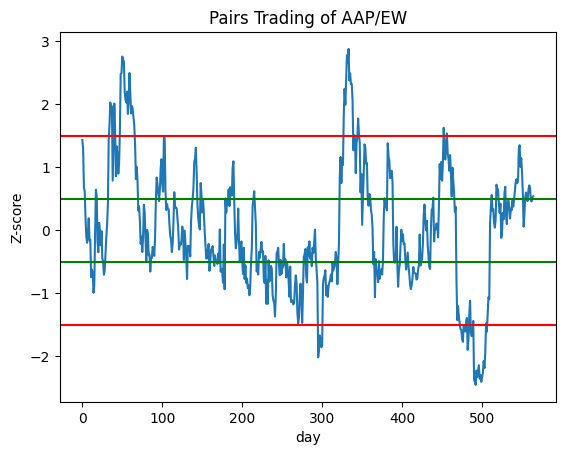

In [ ]:
plt.plot(normalized)
plt.title("Pairs Trading of AAP/EW")
plt.axhline(y = 0.5, color = 'g')    
plt.axhline(y = -0.5, color = 'g')    
plt.axhline(y = 1.5, color = 'r')    
plt.axhline(y = -1.5, color = 'r')  
plt.xlabel("day")
plt.ylabel("Z-score")

<h1> Back-Testing of from the past year

In [ ]:
#Extract the stock tickers of the pairs from the csv into the dataframe
trading_pairs=final_pairs
num_pairs=len(trading_pairs)
trading_pairs

0     1
0    AAL   IVZ
1   ADSK     C
2    AEE   ETR
3   AKAM   DVA
4   AKAM   IFF
5    ALK   GPN
6    ALK   TFX
7    AMP  TSCO
8    AMP   WAB
9    APA   EOG
10   APA   MRO
11   AWK    LH
12   BBY  QRVO
13   BBY  SWKS
14  BKNG    RL
15     C  QRVO
16     C  SWKS
17   CAG    GL
18   CMS   DUK
19   CNP   ELV
20   CNP   IRM
21  COST  PAYX
22  CTVA   GIS
23  CTVA  VRTX
24   DAL   TFX
25   DGX   YUM
26   DLR   HAS
27   DLR   IFF
28   DVN   PXD
29   ELV    GD
30   ELV   WMB
31  EQIX   ROP
32   ETR    KO
33   ETR   WEC
34  EVRG     O
35   FLT  INTC
36   FLT   TFX
37   GPN   LUV
38   HLT   KIM
39   HWM   MRK
40   HWM    RE
41   HWM   SJM
42   IFF   WHR
43  JBHT   WFC
44   KMI   NOC
45    LH  NTRS
46    LH   ROP
47   LIN  TSCO
48  LRCX  NXPI
49   MAR   OKE
50   MCD   PEP
51   NSC   PNC
52   OKE   RTX
53  ORLY   WAB
54    RE  ULTA
55   ROP   TDY
56  TSCO   WAB

In [ ]:
# Get all unique stock tickers
trading_pairs=pd.DataFrame(Mean_Reverting_pairs)
trading_tickers=np.concatenate((trading_pairs[0].unique(),trading_pairs[1].unique()))
trading_tickers

array(['AAL', 'ADSK', 'AEE', 'AKAM', 'ALK', 'AMP', 'APA', 'AWK', 'BBY',
       'BKNG', 'C', 'CAG', 'CMS', 'CNP', 'COST', 'CTVA', 'DAL', 'DGX',
       'DLR', 'DVN', 'ELV', 'EQIX', 'ETR', 'EVRG', 'FLT', 'GPN', 'HLT',
       'HWM', 'IFF', 'JBHT', 'KMI', 'LH', 'LIN', 'LRCX', 'MAR', 'MCD',
       'NSC', 'OKE', 'ORLY', 'RE', 'ROP', 'TSCO', 'IVZ', 'C', 'ETR',
       'DVA', 'IFF', 'GPN', 'TFX', 'TSCO', 'WAB', 'EOG', 'MRO', 'LH',
       'QRVO', 'SWKS', 'RL', 'GL', 'DUK', 'ELV', 'IRM', 'PAYX', 'GIS',
       'VRTX', 'YUM', 'HAS', 'PXD', 'GD', 'WMB', 'ROP', 'KO', 'WEC', 'O',
       'INTC', 'LUV', 'KIM', 'MRK', 'RE', 'SJM', 'WHR', 'WFC', 'NOC',
       'NTRS', 'NXPI', 'OKE', 'PEP', 'PNC', 'RTX', 'ULTA', 'TDY'],
      dtype=object)

In [ ]:
def Get_historical_return_sd(i,trading_pairs):
    first_price_series=np.array(nasdaq_historical[trading_pairs.iloc[i][0]]['adjclose'].values)
    second_price_series=np.array(nasdaq_historical[trading_pairs.iloc[i][1]]['adjclose'].values)
    overall=first_price_series/second_price_series
    mean=np.average(overall)
    sd=np.std(overall)
    return np.array((mean,sd))

In [ ]:
# Get Real Exchange ratio
def Get_trading_pairs_price(i,trading_pairs):
    first_price_series=np.array(nasdaq_historical[trading_pairs.iloc[i][0]]['adjclose'].values)
    second_price_series=np.array(nasdaq_historical[trading_pairs.iloc[i][1]]['adjclose'].values)
    overall=first_price_series/second_price_series
    return overall

In [ ]:
# Get Normalized Pairs Ratio
def Get_return_sd(trading_pairs,i,mean,sd):
    first_price_series=np.array(nasdaq_historical[trading_pairs.iloc[i][0]]['adjclose'].values)
    second_price_series=np.array(nasdaq_historical[trading_pairs.iloc[i][1]]['adjclose'].values)
    overall=first_price_series/second_price_series
    normalized=(overall-mean)/sd
    return normalized

In [ ]:
historical_array=np.array([Get_historical_return_sd(0,trading_pairs)],dtype=np.float64)
for i in range(1,num_pairs,1):
    historical_array=np.append(historical_array,np.array([Get_historical_return_sd(i,trading_pairs)]),axis=0)
pairs_ratio_array=np.array([Get_trading_pairs_price(0,trading_pairs)],dtype=np.float64)
for i in range(1,num_pairs,1):
    pairs_ratio_array=np.append(pairs_ratio_array,np.array([Get_trading_pairs_price(i,trading_pairs)]),axis=0)
price_array=np.array([Get_return_sd(trading_pairs,0,historical_array[0][0],historical_array[0][1])],dtype=np.float64)
for i in range(1,num_pairs,1):
    price_array=np.append(price_array,np.array([Get_return_sd(trading_pairs,i,historical_array[i][0],historical_array[i][1])]),axis=0)

In [ ]:
def price_array_to_short(price_array,sd_short=1.5):
    return np.where(price_array >sd_short, -1, 0)

In [ ]:
def price_array_to_long(price_array,sd_long=-1.5):
    return np.where(price_array <sd_long, 1, 0)

In [ ]:
# 1 indicate long and -1 indicate short and determine the sd you want here
price_action=price_array_to_short(price_array,1.5)+price_array_to_long(price_array,-1.5)
price_action

array([[ 0,  0,  0, ...,  0,  0,  0],
       [-1, -1, -1, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [ 0,  0, -1, ...,  0,  0,  0],
       [-1,  0, -1, ...,  0,  0,  1],
       [ 1,  1,  1, ...,  0,  0,  0]])

In [ ]:
# Get the Real exchange ratio
price_array=np.array([Get_trading_pairs_price(0,trading_pairs)],dtype=np.float64)
for i in range(1,num_pairs,1):
    price_array=np.append(price_array,np.array([Get_trading_pairs_price(i,trading_pairs)]),axis=0)

In [ ]:
# If we are already shorting the stock, don't stock again, vice versa
def price_action_adjustment(price_action):
    for i in range(len(price_action)):
        for j in range(len(price_action[0]-1)):
            if (price_action[i][len(price_action[0])-j-1]==price_action[i][len(price_action[0])-j-2]):
                price_action[i][len(price_action[0])-j-1]=0
    return price_action

In [ ]:
price_action=price_action_adjustment(price_action)

In [ ]:
# Back-testing using 1.5 sd strategy
def back_testing(price_array,price_action):
    back_testing_result=np.zeros((1,len(price_action[0])))
    for i in range(len(price_array)):
        PL_current_stock=np.array([0])
        profit=0
        cost=0
        flag=0 # Let 0 :== position, 1 :== longing postion, -1 :== shorting position
        for j in range(len(price_array[0])):
            
            # Debug
            if (price_action[i][j]!=-1 and price_action[i][j]!=0 and price_action[i][j]!=1):
                print(str(i)+" price_action error")
            if (flag!=-1 and flag!=0 and flag!=1):
                print(str(i)+ " flag error")
            if (cost<0.4 and cost >0.2):
                print("Check "+str(i) +" Cost is "+str(cost))
            # Change Nothing and no record
            if(price_action[i][j]==0 and flag==0):
                PL_current_stock=np.append(PL_current_stock,profit)
                
            # Open a position
            if(price_action[i][j]==1 and flag==0):
                flag=1
                cost=price_array[i][j]
                PL_current_stock=np.append(PL_current_stock,profit)
            if(price_action[i][j]==-1 and flag==0):
                flag=-1
                cost=price_array[i][j]
                PL_current_stock=np.append(PL_current_stock,profit)
            
            # Change nothing
            if(price_action[i][j]==0 and flag==-1):
                PL_current_stock=np.append(PL_current_stock,(cost-price_array[i][j])/price_array[i][j]+profit)
            if(price_action[i][j]==-1 and flag ==-1):
                PL_current_stock=np.append(PL_current_stock,(cost-price_array[i][j])/price_array[i][j]+profit) 
                
            if(price_action[i][j]==0 and flag==1):
                PL_current_stock=np.append(PL_current_stock,(price_array[i][j]-cost)/cost+profit)
            if(price_action[i][j]==1 and flag ==1):
                PL_current_stock=np.append(PL_current_stock,(price_array[i][j]-cost)/cost+profit)
            
            # Closing Position, adjust the flag, cost, and profit
            if(price_action[i][j]==-1 and flag ==1):
                profit=(price_array[i][j]-cost)/cost+profit
                PL_current_stock=np.append(PL_current_stock,profit)
                flag=0
                cost=0
                
            if(price_action[i][j]==1 and flag ==-1):
                profit=(cost-price_array[i][j])/price_array[i][j]+profit
                PL_current_stock=np.append(PL_current_stock,profit)
                flag=0
                cost=0
            
        PL_current_stock=PL_current_stock[:len(price_action[0])]
        back_testing_result=np.concatenate((back_testing_result,[PL_current_stock]),axis=0)
    return  back_testing_result  

In [ ]:
back_testing_result=back_testing(price_array,price_action)

Check 5 Cost is 0.2415146731158539
Check 5 Cost is 0.2415146731158539
Check 5 Cost is 0.2415146731158539
Check 5 Cost is 0.2415146731158539
Check 5 Cost is 0.2415146731158539
Check 5 Cost is 0.2415146731158539
Check 5 Cost is 0.2415146731158539
Check 5 Cost is 0.2415146731158539
Check 5 Cost is 0.2415146731158539
Check 5 Cost is 0.2415146731158539
Check 5 Cost is 0.2415146731158539
Check 5 Cost is 0.2415146731158539
Check 5 Cost is 0.2415146731158539
Check 5 Cost is 0.2415146731158539
Check 5 Cost is 0.2415146731158539
Check 5 Cost is 0.2415146731158539
Check 5 Cost is 0.2415146731158539
Check 5 Cost is 0.2415146731158539
Check 5 Cost is 0.2415146731158539
Check 5 Cost is 0.2415146731158539
Check 5 Cost is 0.2415146731158539
Check 5 Cost is 0.2415146731158539
Check 5 Cost is 0.2415146731158539
Check 5 Cost is 0.2415146731158539
Check 5 Cost is 0.2415146731158539
Check 5 Cost is 0.2415146731158539
Check 5 Cost is 0.2415146731158539
Check 5 Cost is 0.2415146731158539
Check 5 Cost is 0.24

In [ ]:
Conclusion=np.average(back_testing_result,axis=0)*100

In [ ]:
SP500=si.get_data("SPY", start_date="01/01/2021", end_date="12/01/2023",index_as_date = False, interval="1d")

In [ ]:
SP500

date        open        high         low       close    adjclose  \
0   2021-01-04  375.309998  375.450012  364.820007  368.790009  356.767090   
1   2021-01-05  368.100006  372.500000  368.049988  371.329987  359.224304   
2   2021-01-06  369.709991  376.980011  369.119995  373.549988  361.371887   
3   2021-01-07  376.100006  379.899994  375.910004  379.100006  366.741028   
4   2021-01-08  380.589996  381.489990  377.100006  381.260010  368.830627   
..         ...         ...         ...         ...         ...         ...   
570 2023-04-11  410.260010  411.179993  408.920013  409.720001  409.720001   
571 2023-04-12  411.869995  412.170013  407.440002  408.049988  408.049988   
572 2023-04-13  409.179993  413.839996  407.989990  413.470001  413.470001   
573 2023-04-14  412.809998  415.089996  410.059998  412.459991  412.459991   
574 2023-04-17  412.369995  413.959991  411.089996  413.940002  413.940002   

        volume ticker  
0    110210800    SPY  
1     66426200    SPY  
2    107997700    SPY  
3     68766800    SPY  
4     71677200    SPY  
..         ...    ...  
570   59297900    SPY  
571   86420400    SPY  
572   85814800    SPY  
573   78129500    SPY  
574   66326600    SPY  

[575 rows x 8 columns]

In [ ]:
bench_mark=(SP500['adjclose']-SP500['adjclose'].values[0])/SP500['adjclose'].values[0]*100

In [ ]:
bench_mark

0       0.000000
1       0.688745
2       1.290701
3       2.795644
4       3.381348
         ...    
570    14.842432
571    14.374335
572    15.893538
573    15.610437
574    16.025276
Name: adjclose, Length: 575, dtype: float64

In [ ]:
Conclusion/100

array([0.        , 0.        , 0.        , 0.00727159, 0.01549236,
       0.01715491, 0.0161971 , 0.02314111, 0.03605596, 0.03598462,
       0.04898568, 0.04313189, 0.0439397 , 0.04521291, 0.03832552,
       0.04087543, 0.0390809 , 0.03545396, 0.0424186 , 0.04265788,
       0.0399614 , 0.04493582, 0.0444216 , 0.05773474, 0.06654099,
       0.06847461, 0.07834668, 0.07848544, 0.08475821, 0.08609424,
       0.08741975, 0.10012468, 0.10514561, 0.10652831, 0.11739568,
       0.1242658 , 0.12576328, 0.12602193, 0.12687572, 0.12191451,
       0.12876627, 0.1285282 , 0.13679902, 0.14099058, 0.14019727,
       0.14934458, 0.14076151, 0.15118033, 0.14255953, 0.14332916,
       0.14109187, 0.13524866, 0.1419491 , 0.14633892, 0.14935042,
       0.14543063, 0.14006327, 0.14050768, 0.14430011, 0.1437915 ,
       0.13737941, 0.14401814, 0.14090984, 0.14010407, 0.13894149,
       0.14761928, 0.14657424, 0.14574669, 0.14906098, 0.1485794 ,
       0.14567569, 0.1483807 , 0.14307238, 0.14395923, 0.14702

In [ ]:
# Calucalte the Sharpe Ratio : (Rx – Rf) / StdDev_Rx
# Rx = Expected portfolio return.
# Rf = Risk-free rate of return.
# StdDev_Rx = Standard deviation of portfolio return (or, volatility)
# Denote risk-free rate as 0.02
def Sharpe_ratio(conclusion_array):
  return ((np.mean(conclusion_array) - 0.02) / np.std(conclusion_array))

In [ ]:
def Num_pairs(pairs_array):
  return len(pairs_array)

In [ ]:
sharpe_ratio_1=Sharpe_ratio(Conclusion)
sharpe_ratio_1

1.889093135214992

# Try different parameters for the decision rule

# First we try different correlation

In [ ]:
correlation_50=correlation_sorted_array(cointegrated_pairs,threshold=0.50)
correlation_55=correlation_sorted_array(cointegrated_pairs,threshold=0.55)
correlation_60=correlation_sorted_array(cointegrated_pairs,threshold=0.6)
correlation_65=correlation_sorted_array(cointegrated_pairs,threshold=0.65)
correlation_70=correlation_sorted_array(cointegrated_pairs,threshold=0.7)
correlation_75=correlation_sorted_array(cointegrated_pairs,threshold=0.75)
correlation_80=correlation_sorted_array(cointegrated_pairs,threshold=0.8)
correlation_85=correlation_sorted_array(cointegrated_pairs,threshold=0.85)
correlation_90=correlation_sorted_array(cointegrated_pairs,threshold=0.9)
final_pairs_50=Mean_Reverting_sorted_array(correlation_50,threshold=0.4)
final_pairs_55=Mean_Reverting_sorted_array(correlation_55,threshold=0.4)
final_pairs_60=Mean_Reverting_sorted_array(correlation_60,threshold=0.4)
final_pairs_65=Mean_Reverting_sorted_array(correlation_65,threshold=0.4)
final_pairs_70=Mean_Reverting_sorted_array(correlation_70,threshold=0.4)
final_pairs_75=Mean_Reverting_sorted_array(correlation_75,threshold=0.4)
final_pairs_80=Mean_Reverting_sorted_array(correlation_80,threshold=0.4)
final_pairs_85=Mean_Reverting_sorted_array(correlation_85,threshold=0.4)
final_pairs_90=Mean_Reverting_sorted_array(correlation_90,threshold=0.4)

Number of pairs after correlation test is : 301
Number of pairs after correlation test is : 290
Number of pairs after correlation test is : 277
Number of pairs after correlation test is : 264
Number of pairs after correlation test is : 248
Number of pairs after correlation test is : 219
Number of pairs after correlation test is : 193
Number of pairs after correlation test is : 142
Number of pairs after correlation test is : 86
Number of pairs: 112
Number of pairs: 109
Number of pairs: 101
Number of pairs: 93
Number of pairs: 82
Number of pairs: 66
Number of pairs: 57
Number of pairs: 39
Number of pairs: 27


In [ ]:
def back_testing_one_finalized(final_pairs,sd=1.5):
  trading_pairs=pd.DataFrame(final_pairs)
  trading_tickers=np.concatenate((trading_pairs[0].unique(),trading_pairs[1].unique()))
  historical_array=np.array([Get_historical_return_sd(0,trading_pairs)],dtype=np.float64)
  for i in range(1,num_pairs,1):
      historical_array=np.append(historical_array,np.array([Get_historical_return_sd(i,trading_pairs)]),axis=0)
  pairs_ratio_array=np.array([Get_trading_pairs_price(0,trading_pairs)],dtype=np.float64)
  for i in range(1,num_pairs,1):
      pairs_ratio_array=np.append(pairs_ratio_array,np.array([Get_trading_pairs_price(i,trading_pairs)]),axis=0)
  price_array=np.array([Get_return_sd(trading_pairs,0,historical_array[0][0],historical_array[0][1])],dtype=np.float64)
  for i in range(1,num_pairs,1):
      price_array=np.append(price_array,np.array([Get_return_sd(trading_pairs,i,historical_array[i][0],historical_array[i][1])]),axis=0)
  price_action=price_array_to_short(price_array,sd)+price_array_to_long(price_array,-sd)
  price_array=np.array([Get_trading_pairs_price(0,trading_pairs)],dtype=np.float64)
  for i in range(1,num_pairs,1):
      price_array=np.append(price_array,np.array([Get_trading_pairs_price(i,trading_pairs)]),axis=0)  
  price_action=price_action_adjustment(price_action)
  back_testing_result=back_testing(price_array,price_action)
  back_testing_result=np.average(back_testing_result,axis=0)*100
  return back_testing_result

In [ ]:
back_tesing_result_50=back_testing_one_finalized(final_pairs_50)
back_tesing_result_55=back_testing_one_finalized(final_pairs_55)
back_tesing_result_60=back_testing_one_finalized(final_pairs_60)
back_tesing_result_70=back_testing_one_finalized(final_pairs_70)
back_tesing_result_75=back_testing_one_finalized(final_pairs_75)
back_tesing_result_80=back_testing_one_finalized(final_pairs_80)


串流輸出內容已截斷至最後 5000 行。
Check 16 Cost is 0.3513946618480675
Check 16 Cost is 0.3513946618480675
Check 16 Cost is 0.3513946618480675
Check 16 Cost is 0.3513946618480675
Check 16 Cost is 0.3513946618480675
Check 16 Cost is 0.3513946618480675
Check 16 Cost is 0.3513946618480675
Check 16 Cost is 0.3513946618480675
Check 16 Cost is 0.3513946618480675
Check 16 Cost is 0.3513946618480675
Check 16 Cost is 0.3513946618480675
Check 16 Cost is 0.3513946618480675
Check 16 Cost is 0.3513946618480675
Check 16 Cost is 0.3513946618480675
Check 16 Cost is 0.3513946618480675
Check 16 Cost is 0.3513946618480675
Check 16 Cost is 0.3513946618480675
Check 16 Cost is 0.3513946618480675
Check 16 Cost is 0.3513946618480675
Check 16 Cost is 0.3513946618480675
Check 16 Cost is 0.3513946618480675
Check 16 Cost is 0.3513946618480675
Check 16 Cost is 0.3513946618480675
Check 16 Cost is 0.3513946618480675
Check 16 Cost is 0.3513946618480675
Check 16 Cost is 0.3513946618480675
Check 16 Cost is 0.3513946618480675
Check 1

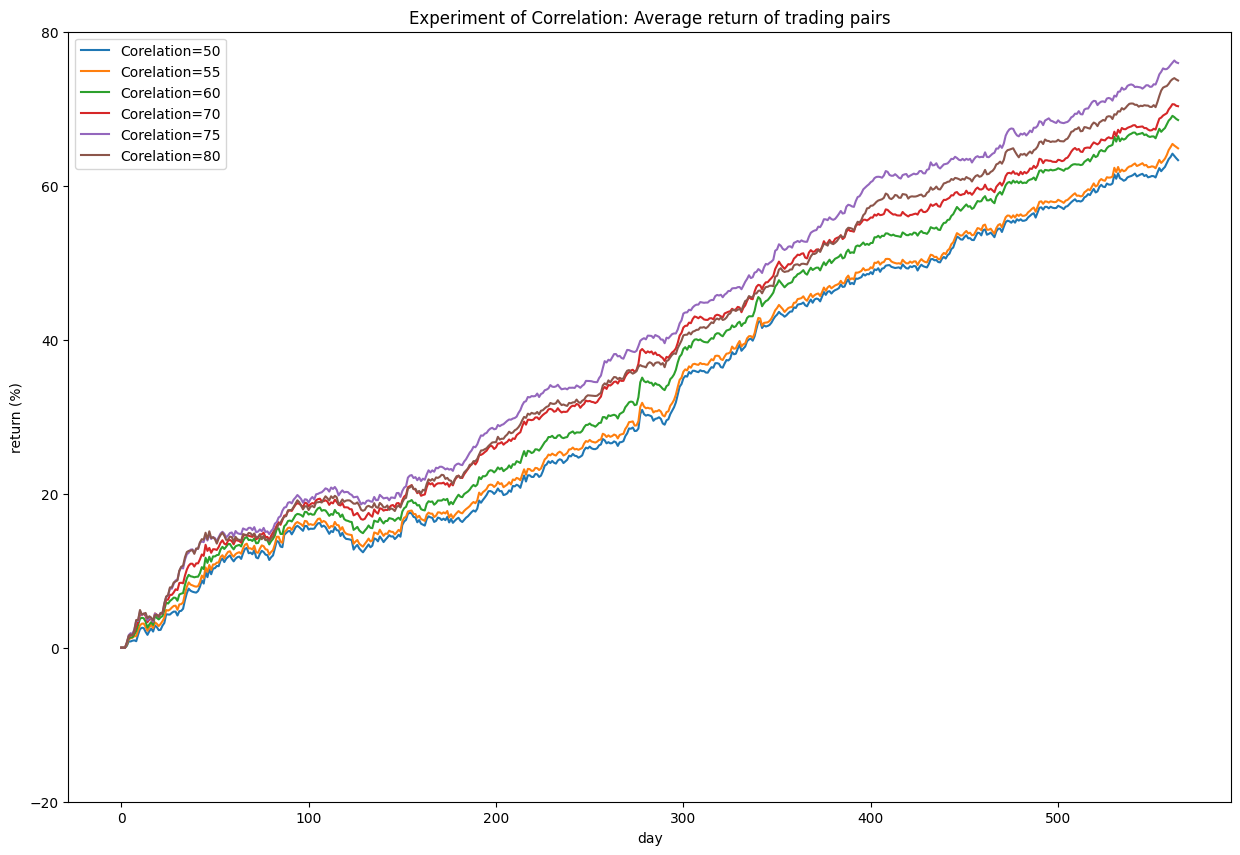

In [ ]:
fig=plt.figure(figsize=(15,10))
plt.plot(back_tesing_result_50,label="Corelation=50")
plt.plot(back_tesing_result_55,label="Corelation=55")
plt.plot(back_tesing_result_60,label="Corelation=60")
plt.plot(back_tesing_result_70,label="Corelation=70")
plt.plot(back_tesing_result_75,label="Corelation=75")
plt.plot(back_tesing_result_80,label="Corelation=80")
plt.title("Experiment of Correlation: Average return of trading pairs")
plt.ylim((-10,80))
plt.xlabel("day")
plt.ylabel("return (%)")
plt.legend()
plt.show()

In [ ]:
# Evalate by Sharpe ratio:
print("The Sharpe Ratio of the  back_testing_result using correlation(50) = ", Sharpe_ratio(back_tesing_result_50))
print("The Sharpe Ratio of the  back_testing_result using correlation(55) = ", Sharpe_ratio(back_tesing_result_55))
print("The Sharpe Ratio of the  back_testing_result using correlation(60) = ", Sharpe_ratio(back_tesing_result_60))
print("The Sharpe Ratio of the  back_testing_result using correlation(70) = ", Sharpe_ratio(back_tesing_result_70))
print("The Sharpe Ratio of the  back_testing_result using correlation(75) = ", Sharpe_ratio(back_tesing_result_75))
print("The Sharpe Ratio of the  back_testing_result using correlation(80) = ", Sharpe_ratio(back_tesing_result_80))


The Sharpe Ratio of the  back_testing_result using correlation(50) =  1.7479443787344064
The Sharpe Ratio of the  back_testing_result using correlation(55) =  1.782471116540527
The Sharpe Ratio of the  back_testing_result using correlation(60) =  1.8163897283783381
The Sharpe Ratio of the  back_testing_result using correlation(70) =  1.9089501103754674
The Sharpe Ratio of the  back_testing_result using correlation(75) =  1.9121690651453886
The Sharpe Ratio of the  back_testing_result using correlation(80) =  1.889093135214992


Correlation with 0.75 seems to be the best correlation in the pair trading. We will then use 0.75 use the optimal value in this project.

#Try different hurst Exponent
The Hurst exponent is used as a measure of long-term memory of time series. It relates to the autocorrelations of the time series, and the rate at which these decrease as the lag between pairs of values increases.A value H in the range 0.5–1 indicates a time series with long-term positive autocorrelation, meaning both that a high value in the series will probably be followed by another high value and that the values a long time into the future will also tend to be high. A value in the range 0 – 0.5 indicates a time series with long-term switching between high and low values in adjacent pairs, meaning that a single high value will probably be followed by a low value and that the value after that will tend to be high, with this tendency to switch between high and low values lasting a long time into the future.

In [ ]:
correlation_20=correlation_sorted_array(cointegrated_pairs,threshold=0.75)
correlation_25=correlation_sorted_array(cointegrated_pairs,threshold=0.75)
correlation_30=correlation_sorted_array(cointegrated_pairs,threshold=0.75)
correlation_35=correlation_sorted_array(cointegrated_pairs,threshold=0.75)
correlation_40=correlation_sorted_array(cointegrated_pairs,threshold=0.75)
correlation_45=correlation_sorted_array(cointegrated_pairs,threshold=0.75)
correlation_50=correlation_sorted_array(cointegrated_pairs,threshold=0.75)
correlation_55=correlation_sorted_array(cointegrated_pairs,threshold=0.75)
correlation_60=correlation_sorted_array(cointegrated_pairs,threshold=0.75)
final_pairs_20=Mean_Reverting_sorted_array(correlation_20,threshold=0.2)
final_pairs_25=Mean_Reverting_sorted_array(correlation_25,threshold=0.25)
final_pairs_30=Mean_Reverting_sorted_array(correlation_30,threshold=0.3)
final_pairs_35=Mean_Reverting_sorted_array(correlation_35,threshold=0.35)
final_pairs_40=Mean_Reverting_sorted_array(correlation_40,threshold=0.4)
final_pairs_45=Mean_Reverting_sorted_array(correlation_45,threshold=0.45)
final_pairs_50=Mean_Reverting_sorted_array(correlation_50,threshold=0.5)
final_pairs_55=Mean_Reverting_sorted_array(correlation_55,threshold=0.55)
final_pairs_60=Mean_Reverting_sorted_array(correlation_60,threshold=0.6)
final_pairs_65=Mean_Reverting_sorted_array(correlation_65,threshold=0.65)
final_pairs_70=Mean_Reverting_sorted_array(correlation_70,threshold=0.7)
final_pairs_75=Mean_Reverting_sorted_array(correlation_75,threshold=0.75)
final_pairs_80=Mean_Reverting_sorted_array(correlation_80,threshold=0.8)

Number of pairs after correlation test is : 219
Number of pairs after correlation test is : 219
Number of pairs after correlation test is : 219
Number of pairs after correlation test is : 219
Number of pairs after correlation test is : 219
Number of pairs after correlation test is : 219
Number of pairs after correlation test is : 219
Number of pairs after correlation test is : 219
Number of pairs after correlation test is : 219
Number of pairs: 0
Number of pairs: 0
Number of pairs: 4
Number of pairs: 15
Number of pairs: 66
Number of pairs: 131
Number of pairs: 182
Number of pairs: 211
Number of pairs: 218
Number of pairs: 264
Number of pairs: 248
Number of pairs: 219
Number of pairs: 193


In [ ]:
back_tesing_result_40=back_testing_one_finalized(final_pairs_40)
back_tesing_result_45=back_testing_one_finalized(final_pairs_45)
back_tesing_result_50=back_testing_one_finalized(final_pairs_50)
back_tesing_result_55=back_testing_one_finalized(final_pairs_55)
back_tesing_result_60=back_testing_one_finalized(final_pairs_60)
back_tesing_result_65=back_testing_one_finalized(final_pairs_65)
back_tesing_result_70=back_testing_one_finalized(final_pairs_70)


串流輸出內容已截斷至最後 5000 行。
Check 4 Cost is 0.28890136392311805
Check 4 Cost is 0.28890136392311805
Check 4 Cost is 0.28890136392311805
Check 4 Cost is 0.28890136392311805
Check 4 Cost is 0.28890136392311805
Check 4 Cost is 0.28890136392311805
Check 4 Cost is 0.28890136392311805
Check 4 Cost is 0.28890136392311805
Check 4 Cost is 0.28890136392311805
Check 4 Cost is 0.28890136392311805
Check 4 Cost is 0.28890136392311805
Check 4 Cost is 0.28890136392311805
Check 4 Cost is 0.28890136392311805
Check 4 Cost is 0.28890136392311805
Check 4 Cost is 0.28890136392311805
Check 4 Cost is 0.28890136392311805
Check 4 Cost is 0.28890136392311805
Check 4 Cost is 0.28890136392311805
Check 4 Cost is 0.28890136392311805
Check 4 Cost is 0.28890136392311805
Check 4 Cost is 0.28890136392311805
Check 4 Cost is 0.28890136392311805
Check 4 Cost is 0.28890136392311805
Check 4 Cost is 0.28890136392311805
Check 4 Cost is 0.28890136392311805
Check 4 Cost is 0.28890136392311805
Check 4 Cost is 0.28890136392311805
Check 4

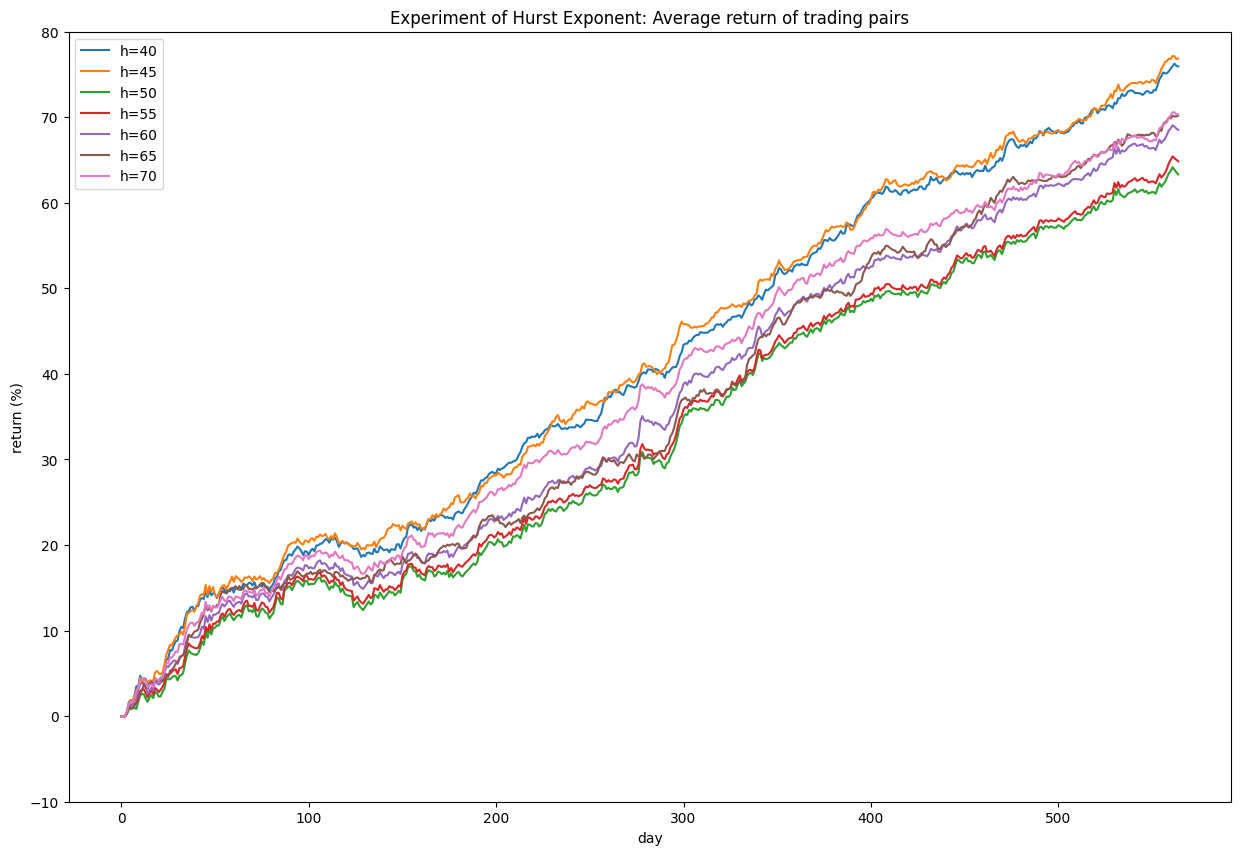

In [ ]:
fig=plt.figure(figsize=(15,10))
plt.plot(back_tesing_result_40,label="h=40")
plt.plot(back_tesing_result_45,label="h=45")
plt.plot(back_tesing_result_50,label="h=50")
plt.plot(back_tesing_result_55,label="h=55")
plt.plot(back_tesing_result_60,label="h=60")
plt.plot(back_tesing_result_65,label="h=65")
plt.plot(back_tesing_result_70,label="h=70")
plt.title("Experiment of Hurst Exponent: Average return of trading pairs")
plt.ylim((-10,80))
plt.xlabel("day")
plt.ylabel("return (%)")
plt.legend()
plt.show()

In [ ]:
print("The Sharpe Ratio of the  back_testing_result using Hurst Exponent(40) = ", Sharpe_ratio(back_tesing_result_40))
print("The Sharpe Ratio of the  back_testing_result using Hurst Exponent(45) = ", Sharpe_ratio(back_tesing_result_45))
print("The Sharpe Ratio of the  back_testing_result using Hurst Exponent(50) = ", Sharpe_ratio(back_tesing_result_50))
print("The Sharpe Ratio of the  back_testing_result using Hurst Exponent(55) = ", Sharpe_ratio(back_tesing_result_55))
print("The Sharpe Ratio of the  back_testing_result using Hurst Exponent(60) = ", Sharpe_ratio(back_tesing_result_60))
print("The Sharpe Ratio of the  back_testing_result using Hurst Exponent(65) = ", Sharpe_ratio(back_tesing_result_65))
print("The Sharpe Ratio of the  back_testing_result using Hurst Exponent(70) = ", Sharpe_ratio(back_tesing_result_70))
print("The Sharpe Ratio of the  back_testing_result using Hurst Exponent(75) = ", Sharpe_ratio(back_tesing_result_75))
print("The Sharpe Ratio of the  back_testing_result using Hurst Exponent(80) = ", Sharpe_ratio(back_tesing_result_80))


The Sharpe Ratio of the  back_testing_result using Hurst Exponent(40) =  1.9121690651453886
The Sharpe Ratio of the  back_testing_result using Hurst Exponent(45) =  1.9342473778503932
The Sharpe Ratio of the  back_testing_result using Hurst Exponent(50) =  1.8272007287174052
The Sharpe Ratio of the  back_testing_result using Hurst Exponent(55) =  1.821027793374802
The Sharpe Ratio of the  back_testing_result using Hurst Exponent(60) =  1.821027793374802
The Sharpe Ratio of the  back_testing_result using Hurst Exponent(65) =  1.7837727400251702
The Sharpe Ratio of the  back_testing_result using Hurst Exponent(70) =  1.8367875677018524
The Sharpe Ratio of the  back_testing_result using Hurst Exponent(75) =  1.821027793374802
The Sharpe Ratio of the  back_testing_result using Hurst Exponent(80) =  1.8323517597277812


From the above, we can see that the optimial correlation is 0.7 and the hurst exponent is 0.45

# Try different standard deviaiton thresold

In [ ]:
final_pairs=correlation_sorted_array(cointegrated_pairs,threshold=0.7)
final_pairs=Mean_Reverting_sorted_array(final_pairs,threshold=0.45)
final_pairs_n5=back_testing_one_finalized(final_pairs,0.95)
final_pairs_n10=back_testing_one_finalized(final_pairs,0.9)
final_pairs_n15=back_testing_one_finalized(final_pairs,0.85)
final_pairs_n20=back_testing_one_finalized(final_pairs,0.8)
final_pairs_n25=back_testing_one_finalized(final_pairs,0.75)
final_pairs_n30=back_testing_one_finalized(final_pairs,0.7)
final_pairs_n35=back_testing_one_finalized(final_pairs,0.65)
final_pairs_n40=back_testing_one_finalized(final_pairs,0.6)
final_pairs_n45=back_testing_one_finalized(final_pairs,0.55)
final_pairs_n50=back_testing_one_finalized(final_pairs,0.5)
final_pairs_n55=back_testing_one_finalized(final_pairs,0.45)
final_pairs_n60=back_testing_one_finalized(final_pairs,0.4)
final_pairs_n65=back_testing_one_finalized(final_pairs,0.35)
final_pairs_n70=back_testing_one_finalized(final_pairs,0.3)
final_pairs_n75=back_testing_one_finalized(final_pairs,0.25)
final_pairs_n80=back_testing_one_finalized(final_pairs,0.2)
final_pairs_0=back_testing_one_finalized(final_pairs,1)
final_pairs_5=back_testing_one_finalized(final_pairs,1.05)
final_pairs_10=back_testing_one_finalized(final_pairs,1.1)
final_pairs_15=back_testing_one_finalized(final_pairs,1.15)
final_pairs_20=back_testing_one_finalized(final_pairs,1.2)
final_pairs_25=back_testing_one_finalized(final_pairs,1.25)
final_pairs_30=back_testing_one_finalized(final_pairs,1.3)
final_pairs_35=back_testing_one_finalized(final_pairs,1.35)
final_pairs_40=back_testing_one_finalized(final_pairs,1.4)
final_pairs_45=back_testing_one_finalized(final_pairs,1.45)
final_pairs_50=back_testing_one_finalized(final_pairs,1.5)

串流輸出內容已截斷至最後 5000 行。
Check 37 Cost is 0.3375341744409947
Check 37 Cost is 0.3375341744409947
Check 37 Cost is 0.3375341744409947
Check 37 Cost is 0.3375341744409947
Check 37 Cost is 0.3375341744409947
Check 37 Cost is 0.3375341744409947
Check 37 Cost is 0.3375341744409947
Check 37 Cost is 0.3375341744409947
Check 37 Cost is 0.3375341744409947
Check 37 Cost is 0.3375341744409947
Check 37 Cost is 0.3375341744409947
Check 37 Cost is 0.3375341744409947
Check 37 Cost is 0.3375341744409947
Check 37 Cost is 0.3375341744409947
Check 37 Cost is 0.3375341744409947
Check 37 Cost is 0.3375341744409947
Check 37 Cost is 0.3375341744409947
Check 37 Cost is 0.3375341744409947
Check 37 Cost is 0.3375341744409947
Check 37 Cost is 0.3375341744409947
Check 37 Cost is 0.3375341744409947
Check 37 Cost is 0.3375341744409947
Check 37 Cost is 0.3375341744409947
Check 37 Cost is 0.3375341744409947
Check 37 Cost is 0.3375341744409947
Check 37 Cost is 0.3375341744409947
Check 37 Cost is 0.3375341744409947
Check 3

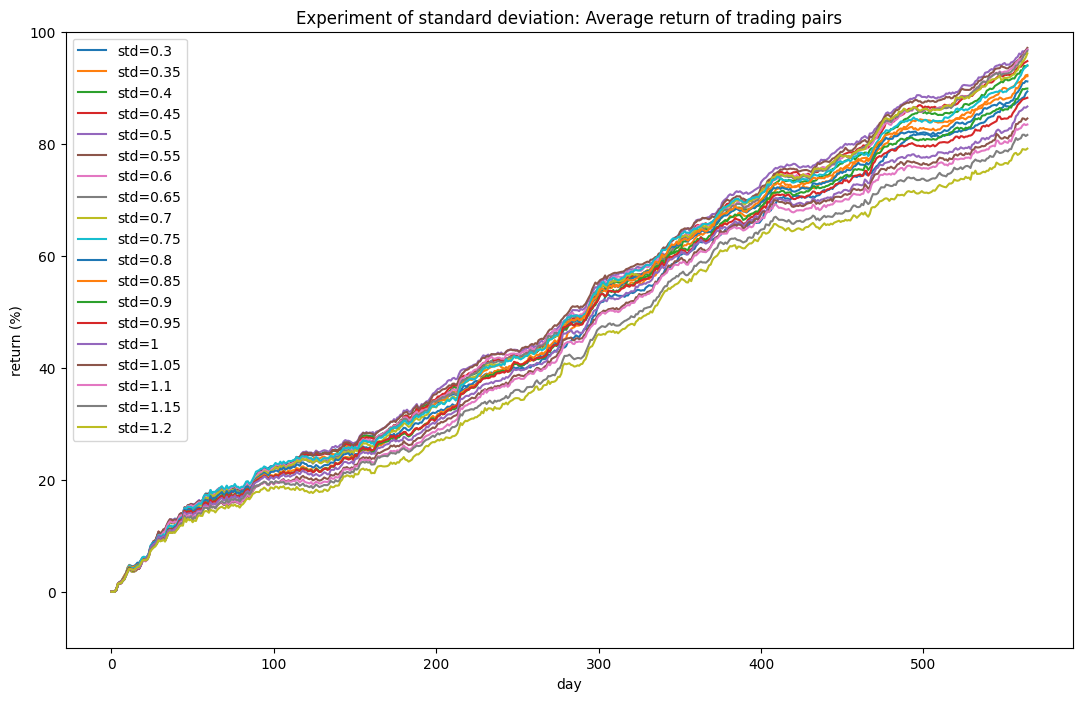

In [115]:
fig=plt.figure(figsize=(13,8))
plt.plot(final_pairs_n70,label="std=0.3")
plt.plot(final_pairs_n65,label="std=0.35")
plt.plot(final_pairs_n60,label="std=0.4")
plt.plot(final_pairs_n55,label="std=0.45")
plt.plot(final_pairs_n50,label="std=0.5")
plt.plot(final_pairs_n45,label="std=0.55")
plt.plot(final_pairs_n40,label="std=0.6")
plt.plot(final_pairs_n35,label="std=0.65")
plt.plot(final_pairs_n30,label="std=0.7")
plt.plot(final_pairs_n25,label="std=0.75")
plt.plot(final_pairs_n20,label="std=0.8")
plt.plot(final_pairs_n15,label="std=0.85")
plt.plot(final_pairs_n10,label="std=0.9")
plt.plot(final_pairs_n5,label="std=0.95")
plt.plot(final_pairs_0,label="std=1")
plt.plot(final_pairs_5,label="std=1.05")
plt.plot(final_pairs_10,label="std=1.1")
plt.plot(final_pairs_15,label="std=1.15")
plt.plot(final_pairs_20,label="std=1.2")
plt.title("Experiment of standard deviation: Average return of trading pairs")
plt.ylim((-10,100))
plt.xlabel("day")
plt.ylabel("return (%)")
plt.legend()
plt.show()

In [ ]:
print("The Sharpe Ratio of the  back_testing_result using Standard deviation 0.3 = ", Sharpe_ratio(final_pairs_n70))
print("The Sharpe Ratio of the  back_testing_result using Standard deviation 0.35 = ", Sharpe_ratio(final_pairs_n65))
print("The Sharpe Ratio of the  back_testing_result using Standard deviation 0.4= ", Sharpe_ratio(final_pairs_n60))
print("The Sharpe Ratio of the  back_testing_result using Standard deviation 0.45= ", Sharpe_ratio(final_pairs_n55))
print("The Sharpe Ratio of the  back_testing_result using Standard deviation 0.5= ", Sharpe_ratio(final_pairs_n50))
print("The Sharpe Ratio of the  back_testing_result using Standard deviation 0.55 = ", Sharpe_ratio(final_pairs_n45))
print("The Sharpe Ratio of the  back_testing_result using Standard deviation 0.6 = ", Sharpe_ratio(final_pairs_n40))
print("The Sharpe Ratio of the  back_testing_result using Standard deviation 0.65= ", Sharpe_ratio(final_pairs_n35))
print("The Sharpe Ratio of the  back_testing_result using Standard deviation 0.7= ", Sharpe_ratio(final_pairs_n30))
print("The Sharpe Ratio of the  back_testing_result using Standard deviation 0.75= ", Sharpe_ratio(final_pairs_n25))
print("The Sharpe Ratio of the  back_testing_result using Standard deviation 0.8= ", Sharpe_ratio(final_pairs_n20))



The Sharpe Ratio of the  back_testing_result using Standard deviation 0.3 =  1.9232154385377538
The Sharpe Ratio of the  back_testing_result using Standard deviation 0.35 =  1.8784069456838985
The Sharpe Ratio of the  back_testing_result using Standard deviation 0.4=  1.877746436206345
The Sharpe Ratio of the  back_testing_result using Standard deviation 0.45=  1.860228427160691
The Sharpe Ratio of the  back_testing_result using Standard deviation 0.5=  1.8653317324118346
The Sharpe Ratio of the  back_testing_result using Standard deviation 0.55 =  1.872866825596189
The Sharpe Ratio of the  back_testing_result using Standard deviation 0.6 =  1.8589372691815165
The Sharpe Ratio of the  back_testing_result using Standard deviation 0.65=  1.838956425256676
The Sharpe Ratio of the  back_testing_result using Standard deviation 0.7=  1.8304072826060582
The Sharpe Ratio of the  back_testing_result using Standard deviation 0.75=  1.877916335490992
The Sharpe Ratio of the  back_testing_result u

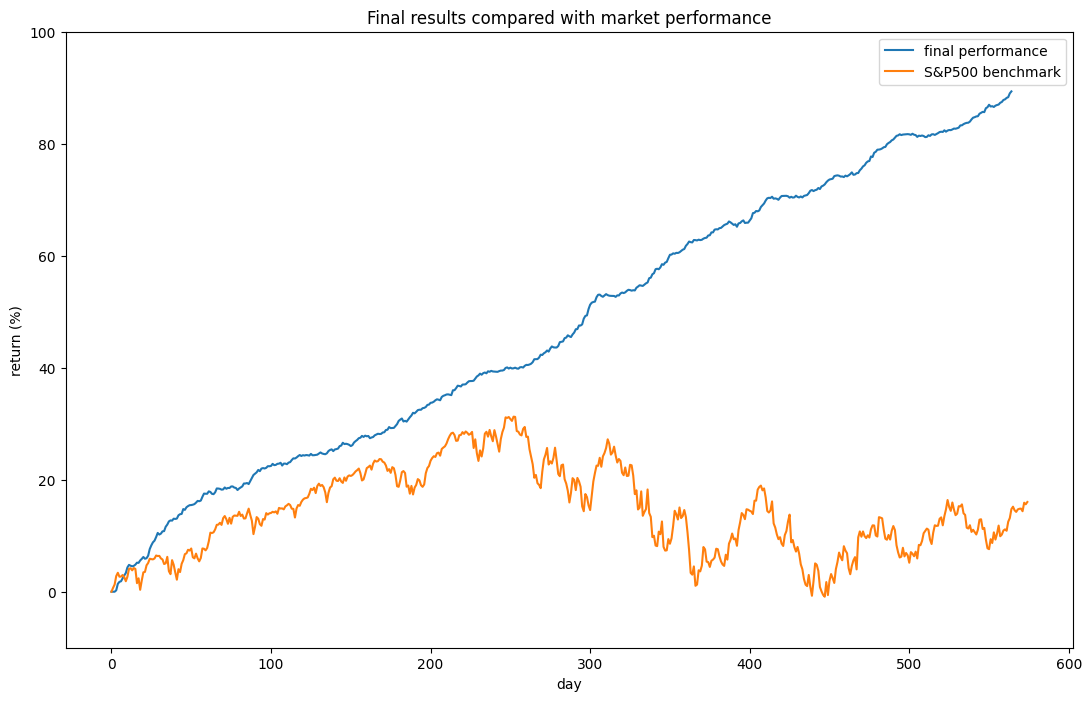

In [116]:
fig=plt.figure(figsize=(13,8))
plt.plot(final_pairs_n70,label="final performance")
plt.plot(bench_mark,label="S&P500 benchmark")
plt.title("Final results compared with market performance")
plt.ylim((-10,100))
plt.xlabel("day")
plt.ylabel("return (%)")
plt.legend()
plt.show()

From the above, we can see that the optimial correlation is 0.7 and the hurst exponent is 0.4, and standard deviation we use is 0.3. The sharpe ratio of our strategy is 1.923

<h1> See other Clustering Method ----  Hierarchical Clustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

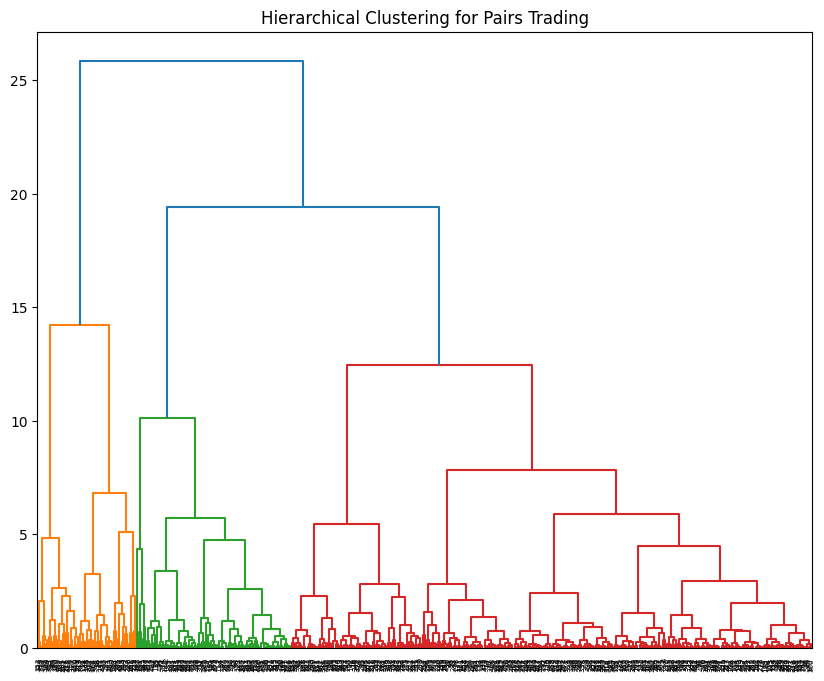

In [ ]:
plt.figure(figsize=(10, 8))
plt.title("Hierarchical Clustering for Pairs Trading")
dend = shc.dendrogram(shc.linkage(X, method='ward'))

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


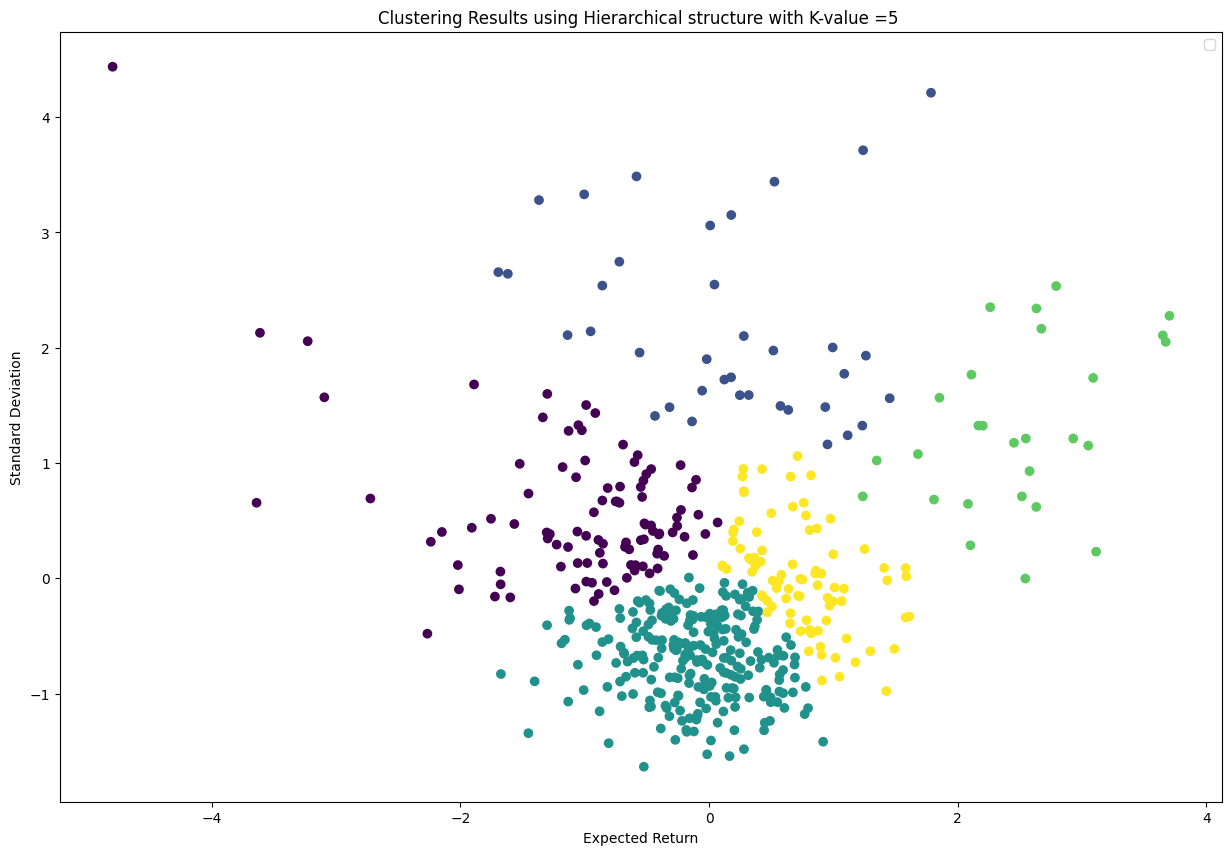

In [114]:
clusters = 5

hc = AgglomerativeClustering(n_clusters= clusters, affinity='euclidean', linkage='ward')
labels = hc.fit_predict(X)
fig=plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
scatter = ax.scatter(X.iloc[:,0], X.iloc[:,1], c=labels)
ax.set_xlabel('Expected Return')
ax.set_ylabel('Standard Deviation')
ax.set_title('Clustering Results using Hierarchical structure with K-value =5 ')
ax.legend()
plt.show()

<h1> Affinity Propagation Clustering

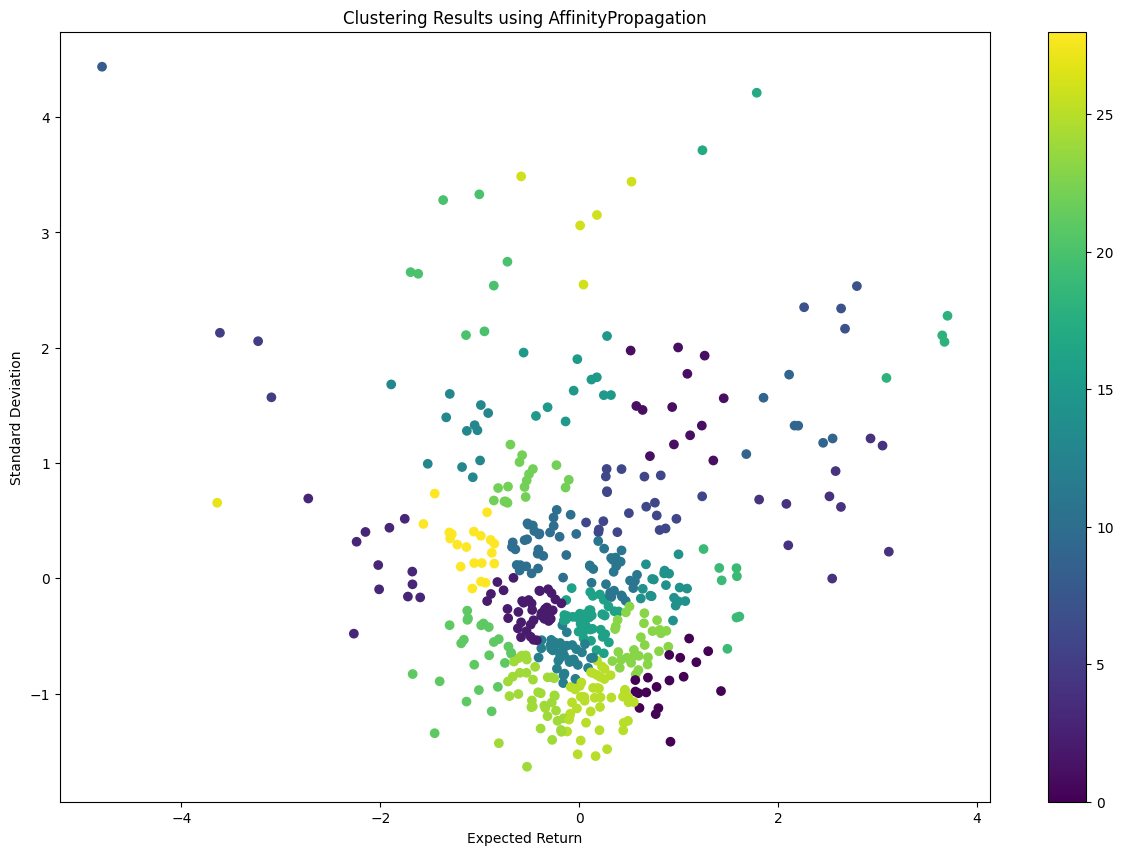

In [ ]:
from sklearn.cluster import AffinityPropagation
ap = AffinityPropagation()
ap.fit(X)
labels1 = ap.predict(X)
fig=plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
scatter = ax.scatter(X.iloc[:,0], X.iloc[:,1], c=labels1)
ax.set_title('Clustering Results using AffinityPropagation')
ax.set_xlabel('Expected Return')
ax.set_ylabel('Standard Deviation')
plt.colorbar(scatter)
plt.show()

<Figure size 640x480 with 0 Axes>

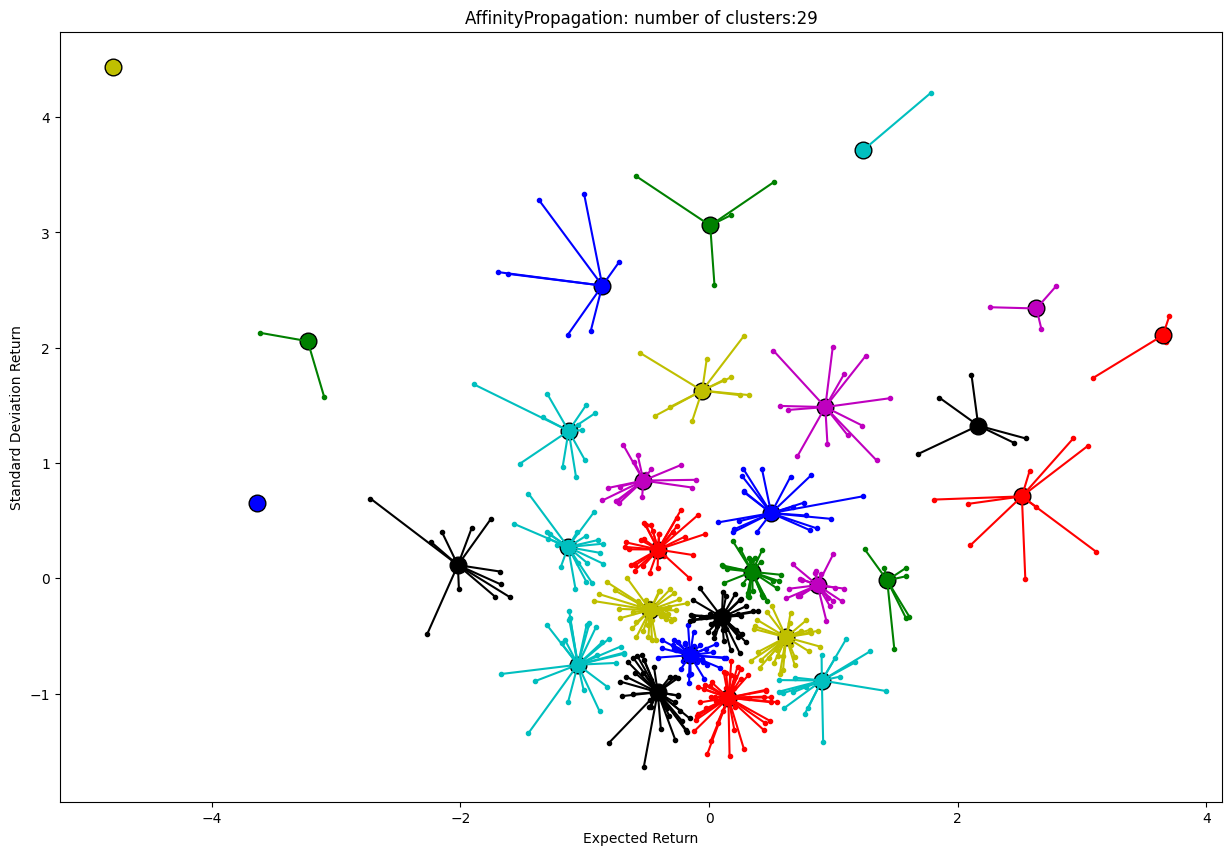

In [ ]:
cci = ap.cluster_centers_indices_
labels2 = ap.labels_
X_ap = np.asarray(X)
plt.close('all')
plt.figure(1)
plt.clf
fig=plt.figure(figsize=(15,10))
colors = cycle('cmykrgbcmykrgbcmykrgbcmykrgb')
for k, col in zip(range(len(cci)),colors):
    cluster_members = labels2 == k
    cluster_center = X_ap[cci[k]]
    plt.plot(X_ap[cluster_members, 0], X_ap[cluster_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=12)
    for x in X_ap[cluster_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)
plt.xlabel("Expected Return")
plt.ylabel("Standard Deviation Return")
plt.title("AffinityPropagation: number of clusters:"+str(len(cci)))
plt.show()

In [ ]:
print("The Silhouette_score for Hierarchical Clustering is", metrics.silhouette_score(X, hc.fit_predict(X), metric='euclidean'))
print("The Silhouette_score for Affinity Propagation Clustering is", metrics.silhouette_score(X, ap.labels_, metric='euclidean'))
print("The Silhouette_score for k-Means Clustering is", metrics.silhouette_score(X, k_means.labels_, metric='euclidean'))

The Silhouette_score for Hierarchical Clustering is 0.348973681634306
The Silhouette_score for Affinity Propagation Clustering is 0.32112281090945183
The Silhouette_score for k-Means Clustering is 0.3527143839578053


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


# Silhouette score ( For your interest)
The Silhouette Coefficient or Silhouette Score is a metric used to **measure the quality of clustering** in unsupervised machine learning. It takes into account both the cohesion (how similar are the points within a cluster) and separation (how dissimilar are the points between different clusters) of the clusters.

The Silhouette Coefficient is a value between -1 and 1, where:

A score of 1 indicates that the points in a cluster are very close to each other and very far away from the points in other clusters.
A score of 0 indicates that the points in a cluster are close to the boundary between two clusters.
A score of -1 indicates that the points in a cluster are assigned to the wrong cluster.
The Silhouette Coefficient is calculated for each point in the dataset, and then the average score is calculated for all points in all clusters. The higher the average Silhouette Coefficient, the better the clustering.<br>
The formula for calculating the Silhouette Coefficient for a single point is:<br>
s(i) = (b(i) - a(i)) / max(a(i), b(i))<br>
where:<br>
a(i) is the average distance from the point i to all other points in the same cluster.<br>
b(i) is the average distance from the point i to all other points in the nearest cluster that i is not a member of.<br>

reference: https://towardsdatascience.com/silhouette-coefficient-validating-clustering-techniques-e976bb81d10c